This notebook is based on code written by Mike from https://github.com/foxtrotmike/PCA-Tutorial/blob/c26fa6270bfe0752bd1a7fe0ca876893c33e0088/pca.ipynb

In this notebook, we look at how PCA works under the hood by going through a comprehensive example. We start with a dataset consisting of height and weight of 13 individuals. 

In [1]:
import numpy as np

In [2]:
heights = np.array([55, 72, 61, 53, 57, 64, 75, 72, 71,67,74,68,82]) #in inches
weights = np.array([71,92, 73, 68, 77, 84, 92, 87, 86, 81, 95, 87, 102]) #in kg

Now we plot the data.

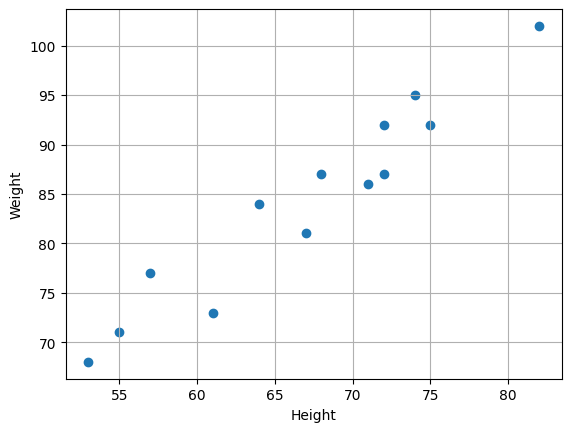

In [3]:
import matplotlib.pyplot as plt
plt.scatter(heights, weights)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid()
plt.savefig("pca_comprehensive_example_scatter_plot.pdf")

Now let's apply PCA

# Standardisation

Before we standardise the data, let's see what happens when the data is not standardised.

In [4]:
X = np.vstack((heights, weights)).T # create data matrix
N, d = X.shape
print("The dimensions of X are:", X.shape)

Xm = np.mean(X, axis=0)
Xs = np.std(X, axis=0)
Xv = np.var(X, axis=0)
print("The mean is:", Xm)
print("The standard deviation is:", Xs)
print("The variance is:", Xv)

Cx = np.cov(X.T, bias=True)
print("The co-variance matrix is:\n", Cx)

The dimensions of X are: (13, 2)
The mean is: [67.         84.23076923]
The standard deviation is: [8.27414881 9.60091219]
The variance is: [68.46153846 92.17751479]
The co-variance matrix is:
 [[68.46153846 76.38461538]
 [76.38461538 92.17751479]]


Now let's standardise the data.

In [5]:
Xn = (X-Xm)/Xs
print("Mean after standardisation:", np.mean(Xn, axis=0))
print("Standard deviation after standardisation:", np.std(Xn, axis=0))
print("Variance after standardisation:", np.var(Xn, axis=0))
print("Total Variance after standardisation:", np.sum(np.var(Xn, axis=0)))

Mean after standardisation: [1.70803542e-17 4.95330273e-16]
Standard deviation after standardisation: [1. 1.]
Variance after standardisation: [1. 1.]
Total Variance after standardisation: 1.9999999999999998


A plot of the standardised data:

In [6]:
Xn

array([[-1.45030024, -1.37807418],
       [ 0.60429177,  0.80921798],
       [-0.72515012, -1.16976065],
       [-1.69201695, -1.69054449],
       [-1.20858353, -0.75313357],
       [-0.36257506, -0.02403618],
       [ 0.96686683,  0.80921798],
       [ 0.60429177,  0.28843413],
       [ 0.48343341,  0.18427736],
       [ 0.        , -0.33650649],
       [ 0.84600847,  1.12168829],
       [ 0.12085835,  0.28843413],
       [ 1.8128753 ,  1.85078568]])

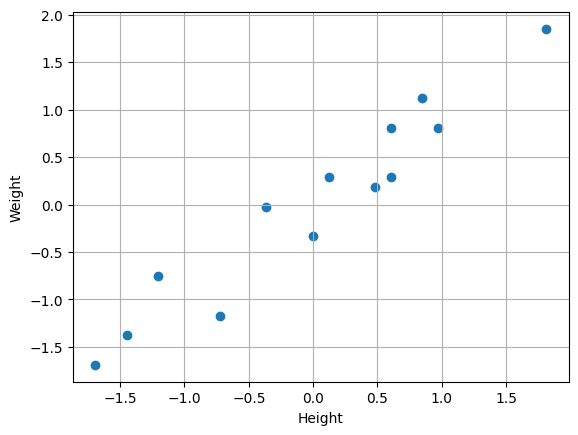

In [45]:
plt.scatter(Xn[:,0], Xn[:,1])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid()
plt.savefig("pca_comprehensive_example_scatter_plot_std.pdf")

# Covariance matrix

In [8]:
C = np.cov(Xn.T, bias=True) # Determine dxd sized Cov. Matrix with normalization by N (Number of samples)

print("Covariance matrix Dimensionality is:", C.shape)
print("Covariance matrix is:\n", C)

Covariance matrix Dimensionality is: (2, 2)
Covariance matrix is:
 [[1.         0.96154601]
 [0.96154601 1.        ]]


Covariance is high for height and weight which implies PCA should work well here. For shoe size and the other features, covariance is small which means PCA will not work well here. As the data is standardised, the covariance ranges from -1 to 1. 

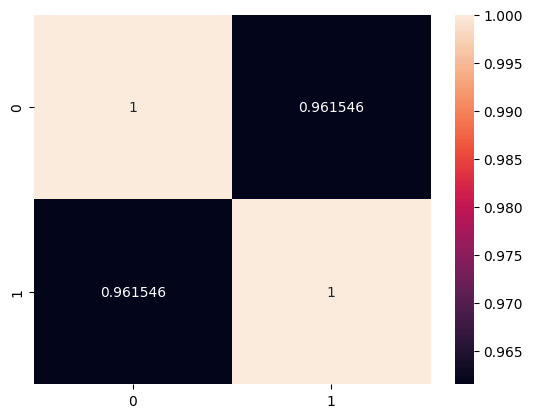

In [13]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


sn.heatmap(C, annot=True, fmt='g')
plt.savefig("pca_comprehensive_example_covariance_matrix_plot.pdf")
plt.show()

# Eigenvectors and eigenvalues of the covariance matrix

In [14]:
ev, pc = np.linalg.eig(C) # Eigenvectors, principle components
ev = np.abs(ev)

cvar = np.var(np.dot(Xn, pc), axis=0)
idx = np.argsort(-cvar)
cvar = cvar[idx]
pc = pc[:, idx]

print("The eigenvectors (principal components) are the columns of:\n", pc)
print("The variance captured along each PC:", cvar)
print("The fraction of variance captured along each PC:", np.cumsum(cvar)/np.sum(cvar))
ev = ev[idx]
print("The eigenvalues are:", ev)
print("The fraction of eigenvalues along each PC:", np.cumsum(ev)/np.sum(ev))

The eigenvectors (principal components) are the columns of:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
The variance captured along each PC: [1.96154601 0.03845399]
The fraction of variance captured along each PC: [0.98077301 1.        ]
The eigenvalues are: [1.96154601 0.03845399]
The fraction of eigenvalues along each PC: [0.98077301 1.        ]


# Plotting the standardised data with the principle components

## Plotting the unit normal principle components

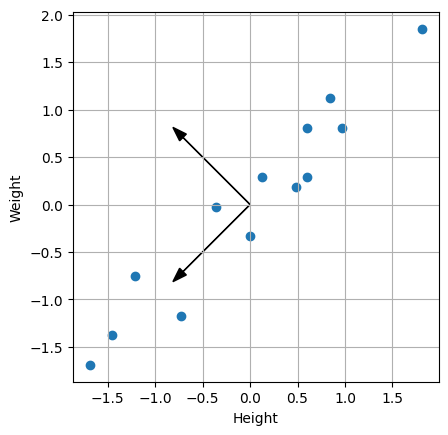

In [24]:
plt.scatter(Xn[:,0], Xn[:,1])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid()
plt.arrow(0, 0, pc[0,0], pc[1,0], head_width=0.1, color="black")
plt.arrow(0, 0, pc[0,1], pc[1,1], head_width=0.1, color="black")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Plotting the data transfromed by PCA

## Taking the first principal component

Here we take the transform along the first principal component and then transform it back into the orignal standardised coordinate system. First we take the transform with only the first principal component

In [28]:
Z = np.dot(Xn, pc[:,:1])

In [29]:
Z.shape, pc[:,:1].T.shape

((13, 1), (1, 2))

Now project it back

In [30]:
pc[:,:1]

array([[-0.70710678],
       [-0.70710678]])

In [31]:
pc[:,:1].T

array([[-0.70710678, -0.70710678]])

In [32]:
Z_inverse = np.dot(np.dot(Xn, pc[:,:1]), pc[:,:1].T)

In [33]:
Z_inverse

array([[-1.41418721, -1.41418721],
       [ 0.70675487,  0.70675487],
       [-0.94745538, -0.94745538],
       [-1.69128072, -1.69128072],
       [-0.98085855, -0.98085855],
       [-0.19330562, -0.19330562],
       [ 0.8880424 ,  0.8880424 ],
       [ 0.44636295,  0.44636295],
       [ 0.33385539,  0.33385539],
       [-0.16825324, -0.16825324],
       [ 0.98384838,  0.98384838],
       [ 0.20464624,  0.20464624],
       [ 1.83183049,  1.83183049]])

In [34]:
Now plot

SyntaxError: invalid syntax (421412464.py, line 1)

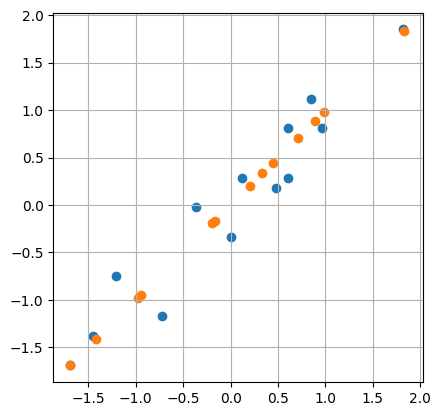

In [35]:
plt.scatter(Xn[:, 0], Xn[:, 1])
plt.scatter(Z_inverse[:, 0], Z_inverse[:, 1])
plt.axis('square')
plt.grid()
plt.show()

# Plotting the scree plot

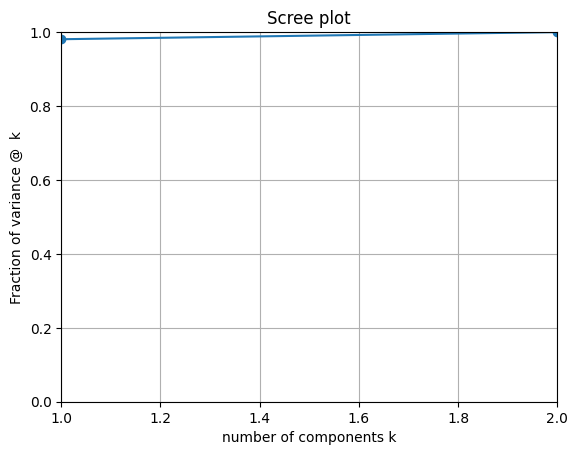

In [36]:

plt.plot(np.arange(len(cvar))+1, np.cumsum(cvar)/np.sum(cvar), 'o-')
plt.axis([1, len(ev), 0, 1])
plt.xlabel("number of components k")
plt.ylabel("Fraction of variance @  k")
plt.grid()
plt.title("Scree plot")
plt.show()

# Some other plots ig could be useful

In [37]:
pc1 = pc[:, 0]
pc2 = pc[:, 1]
print('Dot product of the first two principal components:', np.dot(pc1, pc2))
print('Norm of the first two principal components:', 
      np.linalg.norm(pc1), np.linalg.norm(pc1))

print("The principle component matrix multiple by its transpose:\n",
      np.dot(pc.T, pc))

Dot product of the first two principal components: 1.0146536357569526e-17
Norm of the first two principal components: 1.0 1.0
The principle component matrix multiple by its transpose:
 [[1.00000000e+00 1.01465364e-17]
 [1.01465364e-17 1.00000000e+00]]


In [38]:
k = 1 # number of components to keep
W = pc[:, 0:k] 
Z = np.dot(Xn, W)
print("Data after transformation\n", Z)
print("Standard deviation after transformation", np.std(Z, axis=0))
print("Variance after transformation", np.var(Z, axis=0))
print("Fraction of variance captured along the projections",
      np.var(Z, axis=0)/np.sum(np.var(Xn, axis=0)))

Data after transformation
 [[ 1.99996274]
 [-0.99950233]
 [ 1.33990425]
 [ 2.39183213]
 [ 1.38714346]
 [ 0.27337543]
 [-1.25588161]
 [-0.63125254]
 [-0.47214282]
 [ 0.23794602]
 [-1.39137172]
 [-0.28941349]
 [-2.59059952]]
Standard deviation after transformation [1.40055204]
Variance after transformation [1.96154601]
Fraction of variance captured along the projections [0.98077301]


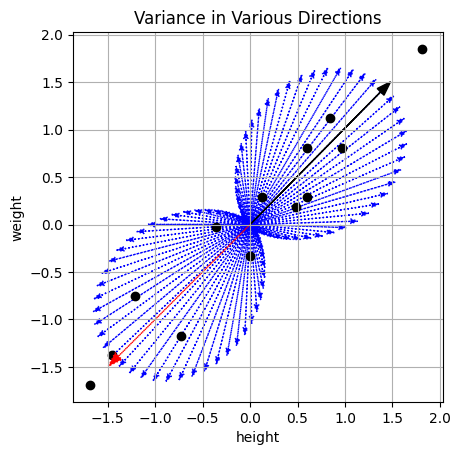

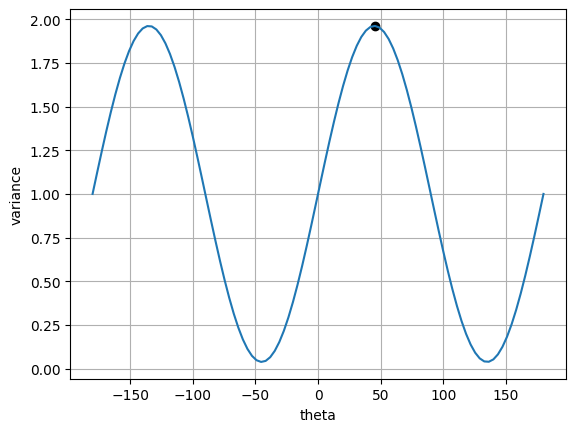

Maximum Variance 1.9614249812906879
Direction of Maximum Variance [0.7014748877063212, 0.7126941713788629]


In [39]:
import numpy as np
theta = (2 * np.linspace(0, 1, 100) - 1)* np.pi
vx = np.zeros(theta.shape[0])
maxv = 0
best_w = None
best_theta = 0
for i, t in enumerate(theta):
    wt = [np.cos(t), np.sin(t)]
    vx[i] = np.var(np.dot(wt, Xn.T))
    plt.arrow(0, 0, vx[i]*wt[0], vx[i]*wt[1], color='b',
              head_width=0.05, linestyle=':')
    if vx[i] > maxv:
        maxv = vx[i]
        best_w = wt
        best_theta = t
plt.scatter(Xn[:, 0], Xn[:, 1], color='k')
plt.arrow(0, 0, maxv*best_w[0], maxv*best_w[1], color='k', head_width=0.1)
plt.arrow(0, 0, cvar[0]*pc[0, 0] ,cvar[0]*pc[1, 0], color='r',
          head_width=0.1, linestyle=':')

plt.grid()
plt.xlabel('height')
plt.ylabel('weight')
plt.axis('square')
plt.title("Variance in Various Directions")
plt.show()

plt.plot(theta*180/np.pi,vx)
plt.scatter(best_theta*180/np.pi, maxv, color='k')
plt.xlabel("theta")
plt.ylabel("variance")
plt.grid()
plt.show()
print("Maximum Variance", maxv)
print("Direction of Maximum Variance", best_w)

Inverse project

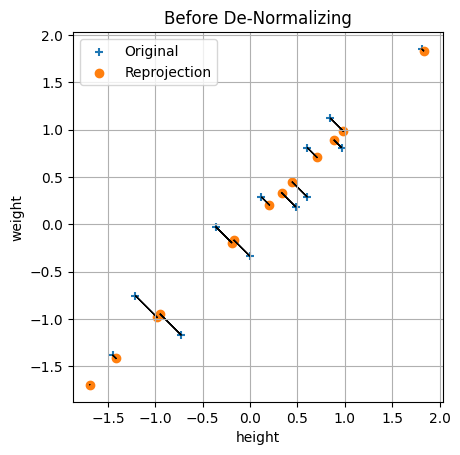

In [40]:
iW = W.T
Xr = np.dot(Z, iW)
plt.scatter(Xn[:, 0], Xn[:, 1], marker='+')
plt.scatter(Xr[:, 0], Xr[:, 1])
plt.legend(['Original', 'Reprojection'])
for x, xr in zip(Xn, Xr):    
    plt.arrow(x[0], x[1], xr[0]-x[0], xr[1]-x[1])
plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.grid()
plt.title('Before De-Normalizing')
plt.show()

In [41]:
print("Average Reconstruction Error over normalized data",
      np.mean(np.linalg.norm(np.dot(Z,iW)-Xn,axis=1)**2))
print("Difference between total variance and variance along projection",
      np.sum(np.var(Xn, axis=0))-np.sum(np.var(Z, axis=0)))


Average Reconstruction Error over normalized data 0.0384539866759385
Difference between total variance and variance along projection 0.038453986675938356
